In [ ]:
import numpy as np
import pickle

# Base Layer class
class Layer:
    def __init__(self):
        self.input = None
        self.output = None

    def forward(self, input):
        raise NotImplementedError

    def backward(self, output_gradient, learning_rate):
        raise NotImplementedError

# Linear Layer
class Linear(Layer):
    def __init__(self, input_size, output_size):
        super().__init__()
        self.weights = np.random.randn(input_size, output_size) * 0.1
        self.bias = np.zeros((1, output_size))

    def forward(self, input):
        self.input = input
        return np.dot(input, self.weights) + self.bias

    def backward(self, output_gradient, learning_rate):
        weights_gradient = np.dot(self.input.T, output_gradient)
        input_gradient = np.dot(output_gradient, self.weights.T)

        self.weights -= learning_rate * weights_gradient
        self.bias -= learning_rate * np.sum(output_gradient, axis=0, keepdims=True)

        return input_gradient

# Activation Functions
class Sigmoid(Layer):
    def forward(self, input):
        self.output = 1 / (1 + np.exp(-input))
        return self.output

    def backward(self, output_gradient, learning_rate):
        return output_gradient * self.output * (1 - self.output)

class ReLU(Layer):
    def forward(self, input):
        self.input = input
        return np.maximum(0, input)

    def backward(self, output_gradient, learning_rate):
        return output_gradient * (self.input > 0)

class Tanh(Layer):
    def forward(self, input):
        self.output = np.tanh(input)
        return self.output

    def backward(self, output_gradient, learning_rate):
        return output_gradient * (1 - self.output ** 2)

# Binary Cross-Entropy Loss
class BinaryCrossEntropy(Layer):
    def __init__(self):
        super().__init__()
        #self.y_true = None
        #self.y_pred = None

    def forward(self, y_true, y_pred):
        self.y_true = y_true
        self.y_pred = np.clip(y_pred, 1e-9, 1 - 1e-9)
        return -np.mean(y_true * np.log(self.y_pred) + (1 - y_true) * np.log(1 - self.y_pred))

    def backward(self):
        return (self.y_pred - self.y_true) / (self.y_pred * (1 - self.y_pred) * len(self.y_true))

# Sequential Model
class Sequential(Layer):
    def __init__(self):
        super().__init__()
        self.layers = []

    def add(self, layer):
        self.layers.append(layer)

    def forward(self, input):
        for layer in self.layers:
            input = layer.forward(input)
        return input

    def backward(self, loss_gradient, learning_rate):
        for layer in reversed(self.layers):
            loss_gradient = layer.backward(loss_gradient, learning_rate)  # Pass learning_rate here


def save(model, filename):
        with open(filename, 'wb') as f:
            pickle.dump(model, f)

def load(filename):
        with open(filename, 'rb') as f:
            return pickle.load(f)

# XOR Training and Testing

def train(model, X, y, epochs, learning_rate):
    loss_function = BinaryCrossEntropy()
    for epoch in range(epochs):
        output = model.forward(X)
        loss = loss_function.forward(y, output)
        loss_gradient = loss_function.backward()
        model.backward(loss_gradient, learning_rate)
        if epoch % 100 == 0:
            print(f"Epoch {epoch}, Loss: {loss}")

X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [1], [1], [0]])


# Train with Sigmoid Activation
print("\nTraining with Sigmoid Activation")
model_sigmoid = Sequential()
model_sigmoid.add(Linear(2, 4))  # Hidden layer with 2 nodes
model_sigmoid.add(Sigmoid())  # Sigmoid activation in hidden layer
model_sigmoid.add(Linear(4, 1))  # Output layer
model_sigmoid.add(Sigmoid())  # Sigmoid activation in output

train(model_sigmoid, X, y, epochs=50000, learning_rate=0.5)


# Test the Model with Sigmoid
predictions_sigmoid = model_sigmoid.forward(X)
binary_predictions_sigmoid = (predictions_sigmoid > 0.5).astype(int)
accuracy_sigmoid = np.mean(binary_predictions_sigmoid == y)
print(f"\nSigmoid XOR Model Accuracy: {accuracy_sigmoid * 100:.2f}%")

# Train with Tanh Activation
print("\nTraining with Tanh Activation")
model_tanh = Sequential()
model_tanh.add(Linear(2, 4))  # Hidden layer with 2 nodes
model_tanh.add(Tanh())  # Tanh activation in hidden layer
model_tanh.add(Linear(4, 1))  # Output layer
model_tanh.add(Sigmoid())  # Sigmoid activation in output

train(model_tanh, X, y, epochs=50000, learning_rate=0.5)


# Test the Model with Tanh
predictions_tanh = model_tanh.forward(X)
binary_predictions_tanh = (predictions_tanh > 0.5).astype(int)
accuracy_tanh = np.mean(binary_predictions_tanh == y)
print(f"\nTanh XOR Model Accuracy: {accuracy_tanh * 100:.2f}%")


# Save trained model
save(model_tanh, "XOR_solved.w")


Training with Sigmoid Activation
Epoch 0, Loss: 0.6934390572672109
Epoch 100, Loss: 0.6931512644035578
Epoch 200, Loss: 0.6931508878188899
Epoch 300, Loss: 0.6931505549718275
Epoch 400, Loss: 0.6931502593247821
Epoch 500, Loss: 0.6931499955062105
Epoch 600, Loss: 0.693149759070198
Epoch 700, Loss: 0.693149546311798
Epoch 800, Loss: 0.6931493541238498
Epoch 900, Loss: 0.6931491798849739
Epoch 1000, Loss: 0.6931490213712335
Epoch 1100, Loss: 0.6931488766859248
Epoch 1200, Loss: 0.6931487442033684
Epoch 1300, Loss: 0.6931486225236049
Epoch 1400, Loss: 0.6931485104356458
Epoch 1500, Loss: 0.6931484068874822
Epoch 1600, Loss: 0.6931483109614673
Epoch 1700, Loss: 0.693148221854003
Epoch 1800, Loss: 0.6931481388586878
Epoch 1900, Loss: 0.6931480613522685
Epoch 2000, Loss: 0.693147988782876
Epoch 2100, Loss: 0.693147920660124
Epoch 2200, Loss: 0.6931478565467444
Epoch 2300, Loss: 0.6931477960514876
Epoch 2400, Loss: 0.6931477388230726
Epoch 2500, Loss: 0.6931476845450117
Epoch 2600, Loss: 0.6


Training with Sigmoid Activation
Epoch 0, Loss: 0.693319654164259
Epoch 10000, Loss: 0.6931461289808323
Epoch 20000, Loss: 0.6750938257551143
Epoch 30000, Loss: 0.0015584236952054765
Epoch 40000, Loss: 0.0007280100915900976

Training with Tanh Activation
Epoch 0, Loss: 0.6933910813378665
Epoch 10000, Loss: 0.00040178133402035243
Epoch 20000, Loss: 0.00016575259112620538
Epoch 30000, Loss: 0.00010034289246117241
Epoch 40000, Loss: 7.078424674805673e-05


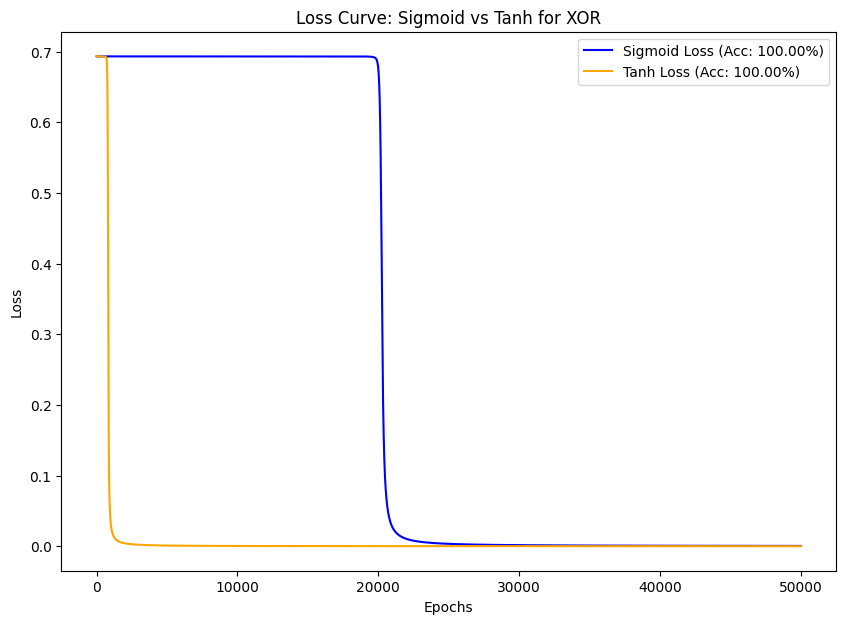


Final Accuracy:
Sigmoid XOR Model Accuracy: 100.00%
Tanh XOR Model Accuracy: 100.00%


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# XOR dataset
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [1], [1], [0]])

# Calculation of Accuracy
def compute_accuracy(model, X, y):
    predictions = model.forward(X)
    binary_predictions = (predictions > 0.5).astype(int)
    accuracy = np.mean(binary_predictions == y) * 100  # Calculate accuracy percentage
    return accuracy


#Training and keeping track of loss

def train_with_loss_tracking(model, X, y, epochs, learning_rate):
    loss_function = BinaryCrossEntropy()
    losses = []
    for epoch in range(epochs):
        output = model.forward(X)
        loss = loss_function.forward(y, output)
        loss_gradient = loss_function.backward()
        model.backward(loss_gradient, learning_rate)
        losses.append(loss)  # Store loss for plotting
        if epoch % 10000 == 0:
            print(f"Epoch {epoch}, Loss: {loss}")
    return losses

# Train with Sigmoid Activation
print("\nTraining with Sigmoid Activation")
model_sigmoid = Sequential()
model_sigmoid.add(Linear(2, 4))
model_sigmoid.add(Sigmoid())
model_sigmoid.add(Linear(4, 1))
model_sigmoid.add(Sigmoid())

losses_sigmoid = train_with_loss_tracking(model_sigmoid, X, y, epochs=50000, learning_rate=0.5)
accuracy_sigmoid = compute_accuracy(model_sigmoid, X, y)

# Train with Tanh Activation
print("\nTraining with Tanh Activation")
model_tanh = Sequential()
model_tanh.add(Linear(2, 4))
model_tanh.add(Tanh())
model_tanh.add(Linear(4, 1))
model_tanh.add(Sigmoid())

losses_tanh = train_with_loss_tracking(model_tanh, X, y, epochs=50000, learning_rate=0.5)
accuracy_tanh = compute_accuracy(model_tanh, X, y)

# Plot loss curves
plt.figure(figsize=(10, 7))
plt.plot(losses_sigmoid, label=f"Sigmoid Loss (Acc: {accuracy_sigmoid:.2f}%)", color="blue")
plt.plot(losses_tanh, label=f"Tanh Loss (Acc: {accuracy_tanh:.2f}%)", color="orange")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss Curve: Sigmoid vs Tanh for XOR")
plt.legend()
plt.show()

# Print accuracy results
print(f"\nFinal Accuracy:")
print(f"Sigmoid XOR Model Accuracy: {accuracy_sigmoid:.2f}%")
print(f"Tanh XOR Model Accuracy: {accuracy_tanh:.2f}%")


In [ ]:

# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_log_error

# Define Mean Squared Error (MSE) Loss Function
class MSE:
    def __init__(self):
        pass

    def forward(self, y_true, y_pred):
        self.y_true = y_true
        self.y_pred = y_pred
        self.output = np.mean((y_true - y_pred) ** 2)
        return self.output

    def backward(self):
        return 2 * (self.y_pred - self.y_true) / len(self.y_true)


In [ ]:
# Load and prepare dataset
dataset = np.load("nyc_taxi_data.npy", allow_pickle=True).item()
X_train, y_train, X_test, y_test = dataset["X_train"], dataset["y_train"], dataset["X_test"], dataset["y_test"]

# Convert arrays to DataFrames
X_train_df = pd.DataFrame(X_train)
y_train_df = pd.DataFrame(y_train, columns=['trip_duration'])  # Naming the target column
X_test_df = pd.DataFrame(X_test)
y_test_df = pd.DataFrame(y_test)

# Dataset Preprocessing

After experimenting with different features, transformations and also normalization techniques. I have kept what works best to see which ones work best.

In [ ]:


# # Extract datetime features from both pickup and dropoff times
# for datetime_col in ['pickup_datetime', 'dropoff_datetime']:
#     for df in [X_train_df, X_test_df]:
#         df[datetime_col] = pd.to_datetime(df[datetime_col])
#         df[f'{datetime_col}_year'] = df[datetime_col].dt.year
#         df[f'{datetime_col}_month'] = df[datetime_col].dt.month
#         df[f'{datetime_col}_day'] = df[datetime_col].dt.day
#         df[f'{datetime_col}_hour'] = df[datetime_col].dt.hour
#         df[f'{datetime_col}_minute'] = df[datetime_col].dt.minute
#         df[f'{datetime_col}_second'] = df[datetime_col].dt.second
#         df[f'{datetime_col}_dayofyear'] = df[datetime_col].dt.dayofyear
# # Drop irrelevant columns from features
# X_train_df = X_train_df.drop(['id', 'vendor_id', 'store_and_fwd_flag','passenger_count','pickup_datetime_year','dropoff_datetime_year','pickup_datetime_dayofyear','dropoff_datetime_dayofyear','pickup_datetime_second','dropoff_datetime_second'],axis=1)
# X_test_df = X_test_df.drop(['id', 'vendor_id', 'store_and_fwd_flag','passenger_count','pickup_datetime_year','dropoff_datetime_year','pickup_datetime_dayofyear','dropoff_datetime_dayofyear','pickup_datetime_second','dropoff_datetime_second'], axis=1)

# # Drop original datetime columns
# datetime_drop_cols = ['pickup_datetime', 'dropoff_datetime']
# X_train_df.drop(columns=datetime_drop_cols, inplace=True)
# X_test_df.drop(columns=datetime_drop_cols, inplace=True)


# Extract required datetime features from both pickup and dropoff times
for datetime_col in ['pickup_datetime', 'dropoff_datetime']:
    for df in [X_train_df, X_test_df]:
        df[datetime_col] = pd.to_datetime(df[datetime_col])
        df[f'{datetime_col}_month'] = df[datetime_col].dt.month    # Extract month
        df[f'{datetime_col}_day'] = df[datetime_col].dt.day        # Extract day
        df[f'{datetime_col}_hour'] = df[datetime_col].dt.hour      # Extract hour
        df[f'{datetime_col}_time'] = df[datetime_col].dt.time      # Extract time (full time object)

# Drop irrelevant columns from features
X_train_df = X_train_df.drop([
    'id', 'vendor_id', 'store_and_fwd_flag', 'passenger_count','pickup_datetime_hour','dropoff_datetime_hour'],axis=1)

X_test_df = X_test_df.drop([
    'id', 'vendor_id', 'store_and_fwd_flag', 'passenger_count','pickup_datetime_hour','dropoff_datetime_hour'], axis=1)

# Drop original datetime columns
datetime_drop_cols = ['pickup_datetime', 'dropoff_datetime']
X_train_df.drop(columns=datetime_drop_cols, inplace=True)
X_test_df.drop(columns=datetime_drop_cols, inplace=True)

# Verify updated DataFrame
print("Updated X_train_df:\n", X_train_df.head())
print("\nUpdated X_test_df:\n", X_test_df.head())


Updated X_train_df:
          pickup_longitude  pickup_latitude  dropoff_longitude  \
879655         -73.955551        40.773346         -73.973640   
646838         -73.962181        40.763599         -73.980377   
1138713        -73.977486        40.751842         -74.011688   
864716         -73.970001        40.762363         -73.963264   
434927         -73.950348        40.771561         -73.968178   

         dropoff_latitude  pickup_datetime_month  pickup_datetime_day  \
879655          40.763500                      1                    8   
646838          40.764919                      3                    5   
1138713         40.718925                      4                    9   
864716          40.774666                      1                    6   
434927          40.762409                      6                   26   

        pickup_datetime_time  dropoff_datetime_month  dropoff_datetime_day  \
879655              23:55:11                       1                   

In [ ]:
X_train_df.head()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,pickup_datetime_month,pickup_datetime_day,pickup_datetime_time,dropoff_datetime_month,dropoff_datetime_day,dropoff_datetime_time
879655,-73.955551,40.773346,-73.973640,40.763500,1,8,23:55:11,1,9,00:04:32
646838,-73.962181,40.763599,-73.980377,40.764919,3,5,09:52:06,3,5,10:00:12
1138713,-73.977486,40.751842,-74.011688,40.718925,4,9,16:03:53,4,9,16:21:22
864716,-73.970001,40.762363,-73.963264,40.774666,1,6,11:12:44,1,6,11:19:49
434927,-73.950348,40.771561,-73.968178,40.762409,6,26,09:10:56,6,26,09:17:44


In [ ]:
X_train_df.shape

(1312779, 10)

In [ ]:
X_test_df.shape

(145865, 10)

In [ ]:
# Convertion of data to numeric format and drop non-numeric columns
X_train_df = X_train_df.apply(pd.to_numeric, errors='coerce').dropna(axis=1)
X_test_df = X_test_df.apply(pd.to_numeric, errors='coerce').dropna(axis=1)

# Normalize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_df)
X_test_scaled = scaler.transform(X_test_df)

# Split training data into training and validation sets
X_train_processed, X_val, y_train_processed, y_val = train_test_split(
    X_train_scaled, y_train_df, test_size=0.20, random_state=42)

# Apply log transformation to target values
y_train_processed = np.log1p(y_train_processed.to_numpy()).reshape(-1, 1)
y_val = np.log1p(y_val.to_numpy()).reshape(-1, 1)
y_test = np.log1p(y_test_df.to_numpy()).reshape(-1, 1)


In [ ]:
# Sigmoid Activation Model
model_sigmoid = Sequential()
model_sigmoid.add(Linear(8, 32))
model_sigmoid.add(Sigmoid())
model_sigmoid.add(Linear(32, 16))
model_sigmoid.add(Sigmoid())
model_sigmoid.add(Linear(16, 1))

# Tanh Activation Model
model_tanh = Sequential()
model_tanh.add(Linear(8, 64))
model_tanh.add(Tanh())
model_tanh.add(Linear(64, 32))
model_tanh.add(Tanh())
model_tanh.add(Linear(32, 16))
model_tanh.add(Tanh())
model_tanh.add(Linear(16, 1))

# ReLU Activation Model
model_relu = Sequential()
model_relu.add(Linear(8, 128))
model_relu.add(ReLU())
model_relu.add(Linear(128, 64))
model_relu.add(ReLU())
model_relu.add(Linear(64, 32))
model_relu.add(ReLU())
model_relu.add(Linear(32, 16))
model_relu.add(ReLU())
model_relu.add(Linear(16, 1))


In [ ]:
# Define Training Function with Early Stopping

def train(model, X, y, X_val, y_val, epochs, learning_rate, losses, val_losses):
    loss_function = MSE()
    patience = 5  # Early stopping patience
    best_loss = np.inf
    no_improvement = 0

    for epoch in range(epochs):
        # Forward pass on training data
        output = model.forward(X)
        loss = loss_function.forward(y, output)
        loss_gradient = loss_function.backward()
        model.backward(loss_gradient, learning_rate)
        losses.append(loss)

        # Forward pass on validation data
        output_val = model.forward(X_val)
        loss_val = loss_function.forward(y_val, output_val)
        val_losses.append(loss_val)

        # Early Stopping Logic
        if loss_val < best_loss:
            best_loss = loss_val
            no_improvement = 0
        else:
            no_improvement += 1
            if no_improvement >= patience:
                print(f"Early stopping at epoch {epoch + 1}")
                break

        # Log loss every 10 epochs
        if epoch % 10 == 0:
            print(f"Epoch {epoch+1}/{epochs} | Training Loss: {loss:.5f} | Validation Loss: {loss_val:.5f}")


In [ ]:
# Initialize loss tracking lists
losses_sigmoid, val_losses_sigmoid = [], []
losses_tanh, val_losses_tanh = [], []
losses_relu, val_losses_relu = [], []

# Train the models
train(model_sigmoid, X_train_processed, y_train_processed, X_val, y_val, 50, 0.005, losses_sigmoid, val_losses_sigmoid)
train(model_tanh, X_train_processed, y_train_processed, X_val, y_val, 50, 0.005, losses_tanh, val_losses_tanh)
train(model_relu, X_train_processed, y_train_processed, X_val, y_val, 50, 0.005, losses_relu, val_losses_relu)

# RMSLE Calculations
def calculate_rmsle(model, X_val, y_val):
    output_val = model.forward(X_val)
    y_pred = np.maximum(output_val, 0)
    y_val_transformed = np.maximum(y_val, 0)
    y_pred = y_pred.reshape(-1, 1)
    y_val_transformed = y_val_transformed.reshape(-1, 1)
    return np.sqrt(mean_squared_log_error(y_val_transformed, y_pred))

rmsle_sigmoid = calculate_rmsle(model_sigmoid, X_val, y_val)
rmsle_tanh = calculate_rmsle(model_tanh, X_val, y_val)
rmsle_relu = calculate_rmsle(model_relu, X_val, y_val)

print(f"RMSLE on Validation Set (Sigmoid): {rmsle_sigmoid:.4f}")
print(f"RMSLE on Validation Set (Tanh): {rmsle_tanh:.4f}")
print(f"RMSLE on Validation Set (ReLU): {rmsle_relu:.4f}")


Epoch 1/50 | Training Loss: 41.14093 | Validation Loss: 37.16648
Epoch 11/50 | Training Loss: 13.62676 | Validation Loss: 12.06265
Epoch 21/50 | Training Loss: 3.62526 | Validation Loss: 3.18688
Epoch 31/50 | Training Loss: 1.15835 | Validation Loss: 1.07832
Epoch 41/50 | Training Loss: 0.71463 | Validation Loss: 0.70532
Epoch 1/50 | Training Loss: 42.44531 | Validation Loss: 41.44900
Epoch 11/50 | Training Loss: 32.35164 | Validation Loss: 31.36172
Epoch 21/50 | Training Loss: 20.73201 | Validation Loss: 19.45754
Epoch 31/50 | Training Loss: 8.07225 | Validation Loss: 7.10381
Epoch 41/50 | Training Loss: 1.90645 | Validation Loss: 1.67970
Epoch 1/50 | Training Loss: 42.39557 | Validation Loss: 41.55361
Epoch 11/50 | Training Loss: 34.03867 | Validation Loss: 33.27335
Epoch 21/50 | Training Loss: 24.97000 | Validation Loss: 23.83347
Epoch 31/50 | Training Loss: 7.76082 | Validation Loss: 5.55191
Epoch 41/50 | Training Loss: 1.66684 | Validation Loss: 1.42058
RMSLE on Validation Set (Si

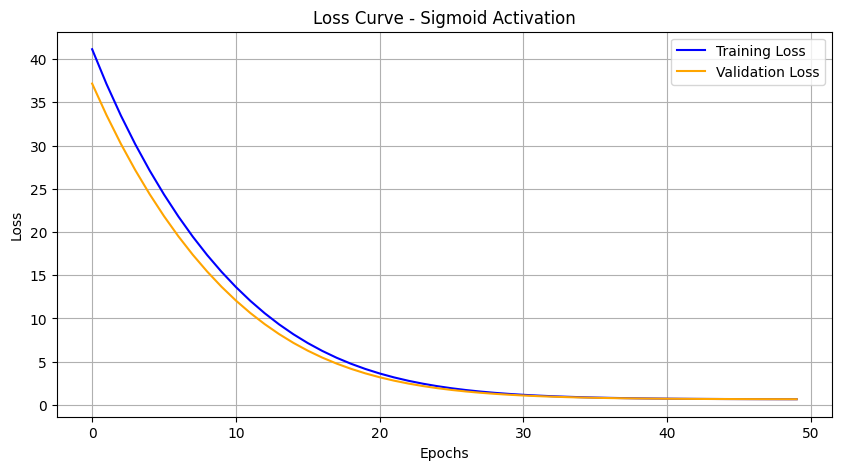

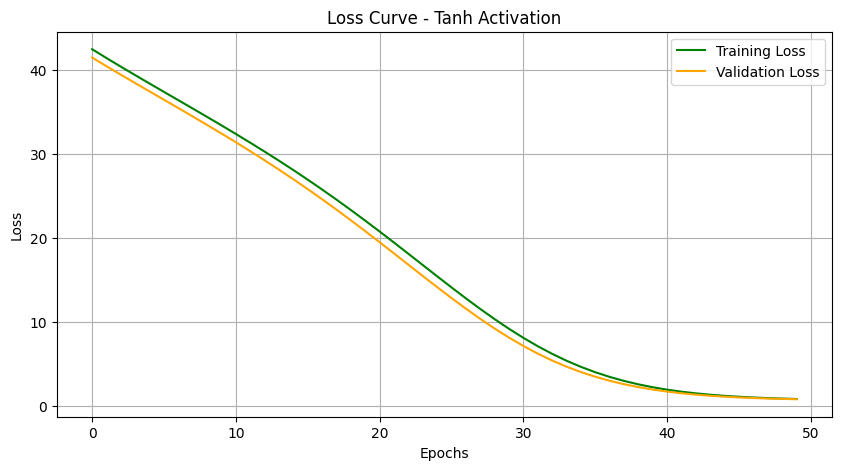

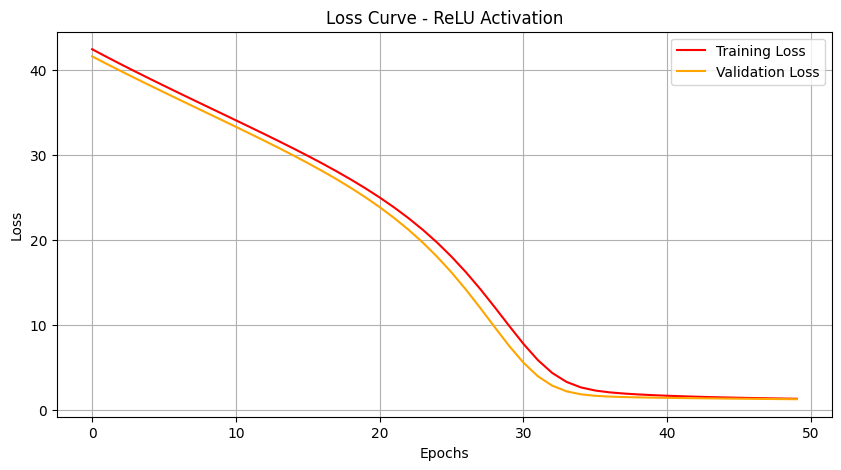

In [ ]:
import matplotlib.pyplot as plt

# Function to plot loss curves for a single model
def plot_loss_curve(training_loss, validation_loss, title, color):
    plt.figure(figsize=(10, 5))
    plt.plot(training_loss, label='Training Loss', color=color)
    plt.plot(validation_loss, label='Validation Loss', color='orange')
    plt.title(title)
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    plt.show()

# Plot Sigmoid Model Loss
plot_loss_curve(losses_sigmoid, val_losses_sigmoid, "Loss Curve - Sigmoid Activation", 'blue')

# Plot Tanh Model Loss
plot_loss_curve(losses_tanh, val_losses_tanh, "Loss Curve - Tanh Activation", 'green')

# Plot ReLU Model Loss
plot_loss_curve(losses_relu, val_losses_relu, "Loss Curve - ReLU Activation", 'red')


Three models using Sigmoid, Tanh, and ReLU activation functions were compared based on their RMSLE and loss curves over 50 epochs. The Sigmoid model performed best, showing the fastest convergence and the lowest RMSLE of 0.1136. The Tanh model followed with an RMSLE of 0.1217, while the ReLU model had the highest RMSLE of 0.1423. The loss curves confirmed that the Sigmoid model minimized both training and validation loss more effectively, making it the most suitable activation function for this task.

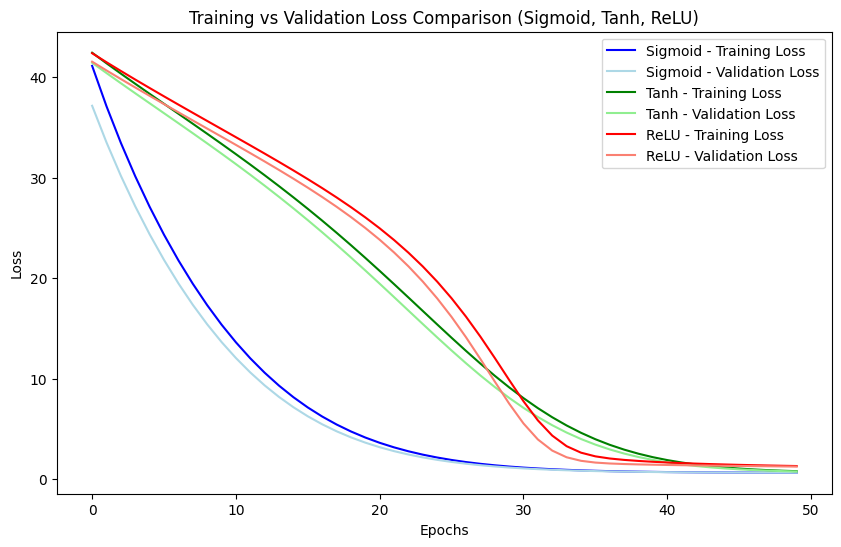

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(losses_sigmoid, label='Sigmoid - Training Loss', color='blue')
plt.plot(val_losses_sigmoid, label='Sigmoid - Validation Loss', color='lightblue')

plt.plot(losses_tanh, label='Tanh - Training Loss', color='green')
plt.plot(val_losses_tanh, label='Tanh - Validation Loss', color='lightgreen')

plt.plot(losses_relu, label='ReLU - Training Loss', color='red')
plt.plot(val_losses_relu, label='ReLU - Validation Loss', color='salmon')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss Comparison (Sigmoid, Tanh, ReLU)')
plt.legend()
plt.show()


# Testing

In [ ]:
y_pred_test = model_sigmoid.forward(X_test_scaled)
sigmoid_test = calculate_rmsle(model_sigmoid, X_test_scaled, y_test)
print(f"RMSLE on Test Set (Sigmoid): {sigmoid_test:.4f}")

RMSLE on Test Set (Sigmoid): 0.1139


In [ ]:
y_pred_test = model_tanh.forward(X_test_scaled)
tanh_test = calculate_rmsle(model_tanh, X_test_scaled, y_test)
print(f"RMSLE on Test Set (Sigmoid): {tanh_test:.4f}")

RMSLE on Test Set (Sigmoid): 0.1219


In [ ]:
y_pred_test = model_relu.forward(X_test_scaled)
relu_test = calculate_rmsle(model_relu, X_test_scaled, y_test)
print(f"RMSLE on Test Set (ReLU): {relu_test:.4f}")

RMSLE on Test Set (ReLU): 0.1421
